# 인공지능기초 대체과제
## face_mask detection - YOLOv5
##### 202221872 김규호

### 필요한 라이브러리 설치

##### PyTorch 탠서 연산과 딥러닝 모델을 만들고 학습 시키기 위해 설치
##### OpenCv는 컴퓨터 비전 라이브러리로, 이미지와 비디오를 처리하고 분석하는 데 사용하기 위해 설치
##### Scicit-learn은 머신러닝 라이브러리로 분류, 회귀, 클러스터링, 차원축소, 데이터 전처리, 모델 평가, 하이퍼파라미터 튜닝등의 기능을 사용하기 위해 설치
##### YOLOv5는 객체 탐지 모델로 이미지나 비디오에서 객체를 실시간으로 탐지하는데 사용 훈련, 추런, 평가들을 쉽게 하기 위해 설치

In [1]:
%pip install torch torchvision torchaudio
%pip install opencv-python
%pip install scikit-learn
%pip install yolov5


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 필요한 패키지 임포트
#### 패키지(osm zipfile, shutil, train_test_split, matplotlib.pyplot, torch, cv2) 임포트

In [3]:
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import cv2

### YOLOv5 클론 설치

In [24]:
!git clone https://github.com/ultralytics/yolov5
os.chdir('yolov5')
!pip install -r requirements.txt

Cloning into 'yolov5'...



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## face_mask 압축 풀기
#### 상대경로 사용

In [4]:
# 압축 파일 경로와 해제 경로 설정
zip_file_path = "../face_mask.zip"  
extract_path = "../face_mask"

# 압축 해제
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("데이터셋이 압축 해제되었습니다.")
except FileNotFoundError:
    print(f"압축 파일을 찾을 수 없습니다: {zip_file_path}")

# 압축 해제 후 파일 목록 확인
for root, dirs, files in os.walk(extract_path):
    print(f"디렉토리 경로: {root}")
    print(f"디렉토리 내 폴더: {dirs}")
    print(f"디렉토리 내 파일: {files}")


현재 작업 디렉토리: c:\Users\user\Desktop\ai_work\yolov5
데이터셋이 압축 해제되었습니다.
디렉토리 경로: ../face_mask
디렉토리 내 폴더: ['face_mask']
디렉토리 내 파일: []
디렉토리 경로: ../face_mask\face_mask
디렉토리 내 폴더: []
디렉토리 내 파일: ['maksssksksss0.png', 'maksssksksss0.txt', 'maksssksksss1.png', 'maksssksksss1.txt', 'maksssksksss10.png', 'maksssksksss10.txt', 'maksssksksss100.png', 'maksssksksss100.txt', 'maksssksksss101.png', 'maksssksksss101.txt', 'maksssksksss102.png', 'maksssksksss102.txt', 'maksssksksss103.png', 'maksssksksss103.txt', 'maksssksksss104.png', 'maksssksksss104.txt', 'maksssksksss105.png', 'maksssksksss105.txt', 'maksssksksss106.png', 'maksssksksss106.txt', 'maksssksksss107.png', 'maksssksksss107.txt', 'maksssksksss108.png', 'maksssksksss108.txt', 'maksssksksss109.png', 'maksssksksss109.txt', 'maksssksksss11.png', 'maksssksksss11.txt', 'maksssksksss110.png', 'maksssksksss110.txt', 'maksssksksss111.png', 'maksssksksss111.txt', 'maksssksksss112.png', 'maksssksksss112.txt', 'maksssksksss113.png', 'maksssksksss113.txt'

### 데이터셋 라벨 설정

In [24]:
# 데이터셋 경로
dataset_path = extract_path

# 이미지 파일과 라벨 파일 목록 생성
image_files = []
label_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png'):
            image_files.append(os.path.join(root, file))
        if file.endswith('.txt'):
            label_files.append(os.path.join(root, file))

# 목록 출력
print(f"이미지 파일 목록: {image_files}")
print(f"라벨 파일 목록: {label_files}")

NameError: name 'extract_path' is not defined

###  데이터셋 분할
#### test, train, val 3개의 파일에 각각 images, labels 폴더를 넣어서 데이터 셋 분류

In [6]:
dataset_path = "../face_mask"

# 이미지 파일과 라벨 파일 목록 생성
image_files = []
label_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png'):
            image_files.append(os.path.join(root, file))
            label_file = file.replace('.png', '.txt')
            label_path = os.path.join(root, label_file)
            if os.path.exists(label_path):
                label_files.append(label_path)
            else:
                print(f"Label file not found for {file}. Skipping...")

# 데이터셋 분할
train_images, temp_images, train_labels, temp_labels = train_test_split(image_files, label_files, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

# 분할된 데이터셋을 저장할 디렉토리 생성
os.makedirs(os.path.join(dataset_path, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'val/labels'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'test/labels'), exist_ok=True)

# 파일 이동 함수
def move_files(img_files, lbl_files, dest_dir):
    for img_path, lbl_path in zip(img_files, lbl_files):
        img_name = os.path.basename(img_path)
        lbl_name = os.path.basename(lbl_path)
        img_dest_path = os.path.join(dest_dir, 'images', img_name)
        lbl_dest_path = os.path.join(dest_dir, 'labels', lbl_name)
        if os.path.exists(img_path):
            shutil.move(img_path, img_dest_path)
        else:
            print(f"Image file not found for {img_name}. Skipping...")
        if os.path.exists(lbl_path):
            shutil.move(lbl_path, lbl_dest_path)
        else:
            print(f"Label file not found for {lbl_name}. Skipping...")

# 데이터셋 분할 후 파일 이동
move_files(train_images, train_labels, os.path.join(dataset_path, 'train'))
move_files(val_images, val_labels, os.path.join(dataset_path, 'val'))
move_files(test_images, test_labels, os.path.join(dataset_path, 'test'))

# 삭제할 디렉토리 경로
dir_to_delete = '../face_mask/face_mask'

# 디렉토리 삭제
shutil.rmtree(dir_to_delete)

print(f"{dir_to_delete} 디렉토리가 삭제되었습니다.")
print("데이터셋이 train, validation, test로 분할되었습니다.")


../face_mask/face_mask 디렉토리가 삭제되었습니다.
데이터셋이 train, validation, test로 분할되었습니다.


### 클래스별 이미지수 확인

In [33]:
# 데이터셋 경로
dataset_path = "../face_mask/train/labels"

# 클래스별 이미지 수 확인
class_counts = {'with_mask': 0, 'without_mask': 0, 'mask_weared_incorrect': 0}
class_names = ['with_mask', 'without_mask', 'mask_weared_incorrect']

for label_file in os.listdir(dataset_path):
    with open(os.path.join(dataset_path, label_file), 'r') as f:
        for line in f:
            class_id = int(line.split()[0])
            class_name = class_names[class_id]
            class_counts[class_name] += 1

print("클래스별 이미지 수:", class_counts)


클래스별 이미지 수: {'with_mask': 2022, 'without_mask': 409, 'mask_weared_incorrect': 68}


### data.yaml 파일 생성
##### 데이터 학습, 검증에 사용될 데이터셋 경로와 클래스 정보를 포함

In [15]:
data_config = """
test: ../face_mask/test/images
train: ../face_mask/train/images
val: ../face_mask/val/images

nc: 3 
names: ['with_mask', 'without_mask', 'mask_weared_incorrect']
"""

# 파일 생성 및 내용 쓰기
with open('data.yaml', 'w') as f:
    f.write(data_config)

print("data.yaml file has been created.")


data.yaml file has been created.


### 데이터 훈련
##### 이미지 크기 640, 배치 크기 16, 데이터셋 설정 data.yaml 경로, 모델 구조 정의, 데이터셋 캐시를 저장(학습 속도 상승), 메인 프로세스 데이터 로딩 수행

In [30]:
! python train.py --img 640 --batch-size 16 --epochs 50 --data data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --cache --workers 0
    

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
From https://github.com/ultralytics/yolov5
   098ce03f..b20fa802  master     -> origin/master
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-327-g098ce03f Python-3.10.11 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.

In [4]:
current_path = os.getcwd()
print(f"현재 작업 디렉토리: {current_path}")

현재 작업 디렉토리: c:\Users\user\Desktop\ai_work\yolov5


## Detect 이미지 객체 탐지 및 시각화

##### 모델링 가중치 파일 경로지정, 이미지 크키 416x416, 객체 탐지에 사용할 신뢰도 임계값 설정, 탐지할 이미지 경로

In [33]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source ../face_mask/test/images


detect: weights=['runs/train/exp/weights/best.pt'], source=../face_mask/test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-327-g098ce03f Python-3.10.11 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/161 C:\Users\user\Desktop\ai_work\face_mask\test\images\maksssksksss103.png: 320x416 4 with_masks, 48.7ms
image 2/161 C:\Users\user\Desktop\ai_work\face_mask\test\images\maksssksksss104.png: 288x416 3 with_masks, 5 without_masks, 58.9ms
image 3/161 C:\Users\user\Desktop\ai_work\face_mask\test\images\maksssksksss107.png: 416x320 1 with_mask,

#### 기본 이미지와 결과 이미지 비교

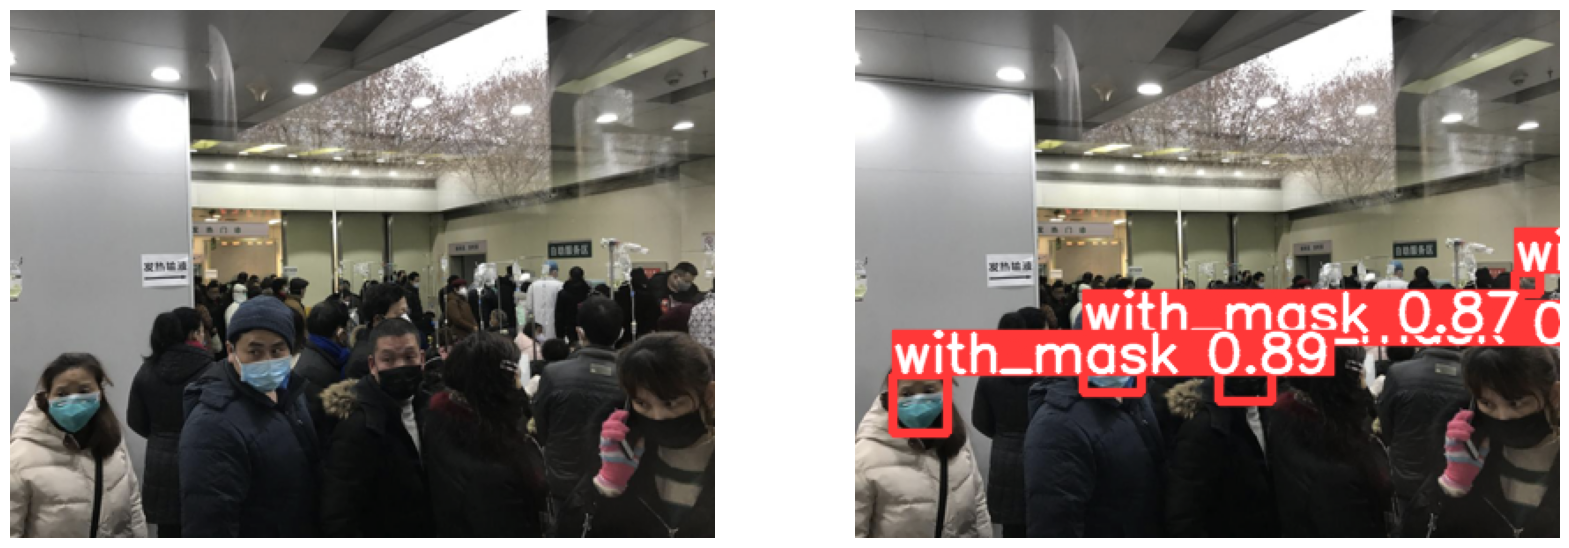

In [16]:
import random

# 경로 설정
detect_path = 'runs/detect/exp/'
test_image_path = '../face_mask/test/images/'

# 이름 패턴
file_pattern = 'maksssksksss'

# 동일한 파일 찾기
detect_files = set(f for f in os.listdir(detect_path) if f.startswith(file_pattern) and f.endswith('.png'))
test_files = set(f for f in os.listdir(test_image_path) if f.startswith(file_pattern) and f.endswith('.png'))

# 공통 파일 찾기
common_files = list(detect_files.intersection(test_files))

# 랜덤으로 공통 파일 선택
random_file = random.choice(common_files)

# 파일 경로 설정
detect_file_path = os.path.join(detect_path, random_file)
test_file_path = os.path.join(test_image_path, random_file)

# 이미지 로드
detect_img = plt.imread(detect_file_path)
test_img = plt.imread(test_file_path)

# 이미지 출력
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(detect_img)
plt.axis('off')

plt.show()


## Losses 출력

##### train/box_loss : 학습 데이터와 실제 바운딩 박스간 손실측정 (값이 낮을수록 모델이 객체의 위치를 더 정확하게 예측)
##### train/obj_loss : 학습 데이터에 대한 객체 존재 여부 손실 (값이 낮을수록 모델이 객체 존재 여부를 더 정확하게 예측)
##### train/cls_loss : 학습 데이터에 대한 클래스 예측 손실(값이 낮을수록 모델이 객체 클래스를 더 정확하게 예측)
##### val/box_loss : 검증 데이터에 대한 바운딩 박스 손실(값이 낮을수록 모델이 검증 데이터에서 객체 위치를 더 정확하게 예측)
##### val/obj_loss : 검증 데이터에 대한 객체 존제 여부 손실(값이 낮을수록 모델이 검증 데이터에서 객체 존재 여부를 더 정확하게 예측)
##### val/cls_loss : 검증 데이터에 대한 클래스 예측 손실(값이 낮을수록 모델이 검증 데이터에서 객체 클래스를 더 정확하게 예측)
##### metrics/precision : 모델이 예측한 객체 중 실제로 맞춘 객체 비율(값이 높을수록 모델 예측이 정확)
##### metrics/recall : 실제 객체 중 모델이 올바르게 예측한 객체 비율(값이 높을수록 모델이 놓친 객체 적음)
##### metrics/mAP_0.5 : 평균 정밀도(AP)를 IoU 임계값 0.5에서 계산한 값(값이 높을 수록 모델의 예측 성능 상향)
##### metrics/mAP_0.5:0.95 : 여러 IoU 임계값(0.5~0.95)을 사용한 평균 정밀도(값이 높을 수록 다양한 조건에서 모델의 예측 성능 상향)

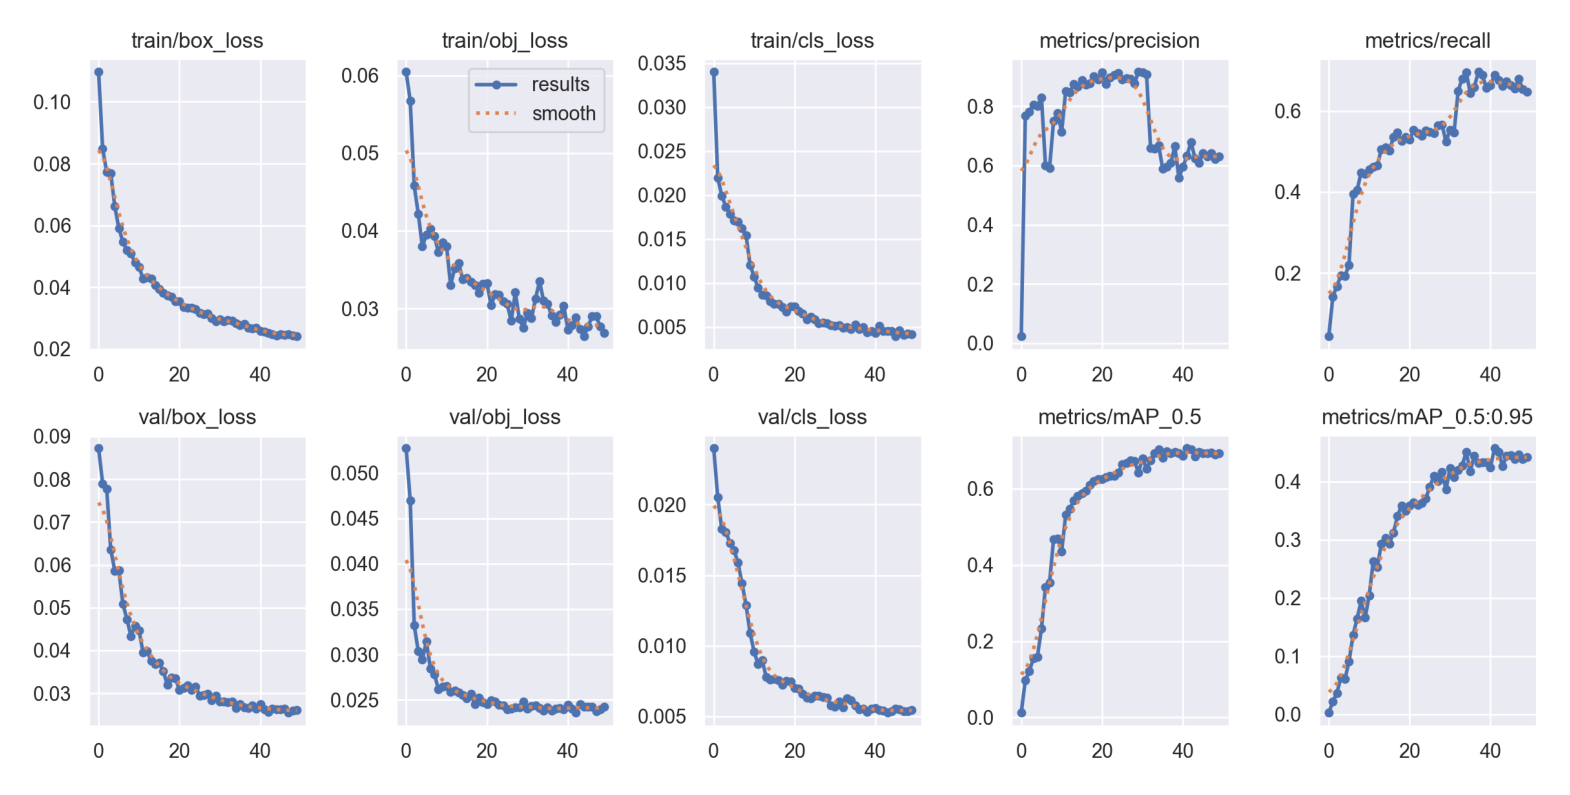

In [6]:
# losses 이미지 경로 
res = plt.imread('runs/train/exp/results.png')
# 이미지 출력
plt.figure(figsize=(20,15))
plt.imshow(res)
plt.axis('off')
plt.show()

### 라벨링 데이터 바운딩박스 포함 이미지 출력

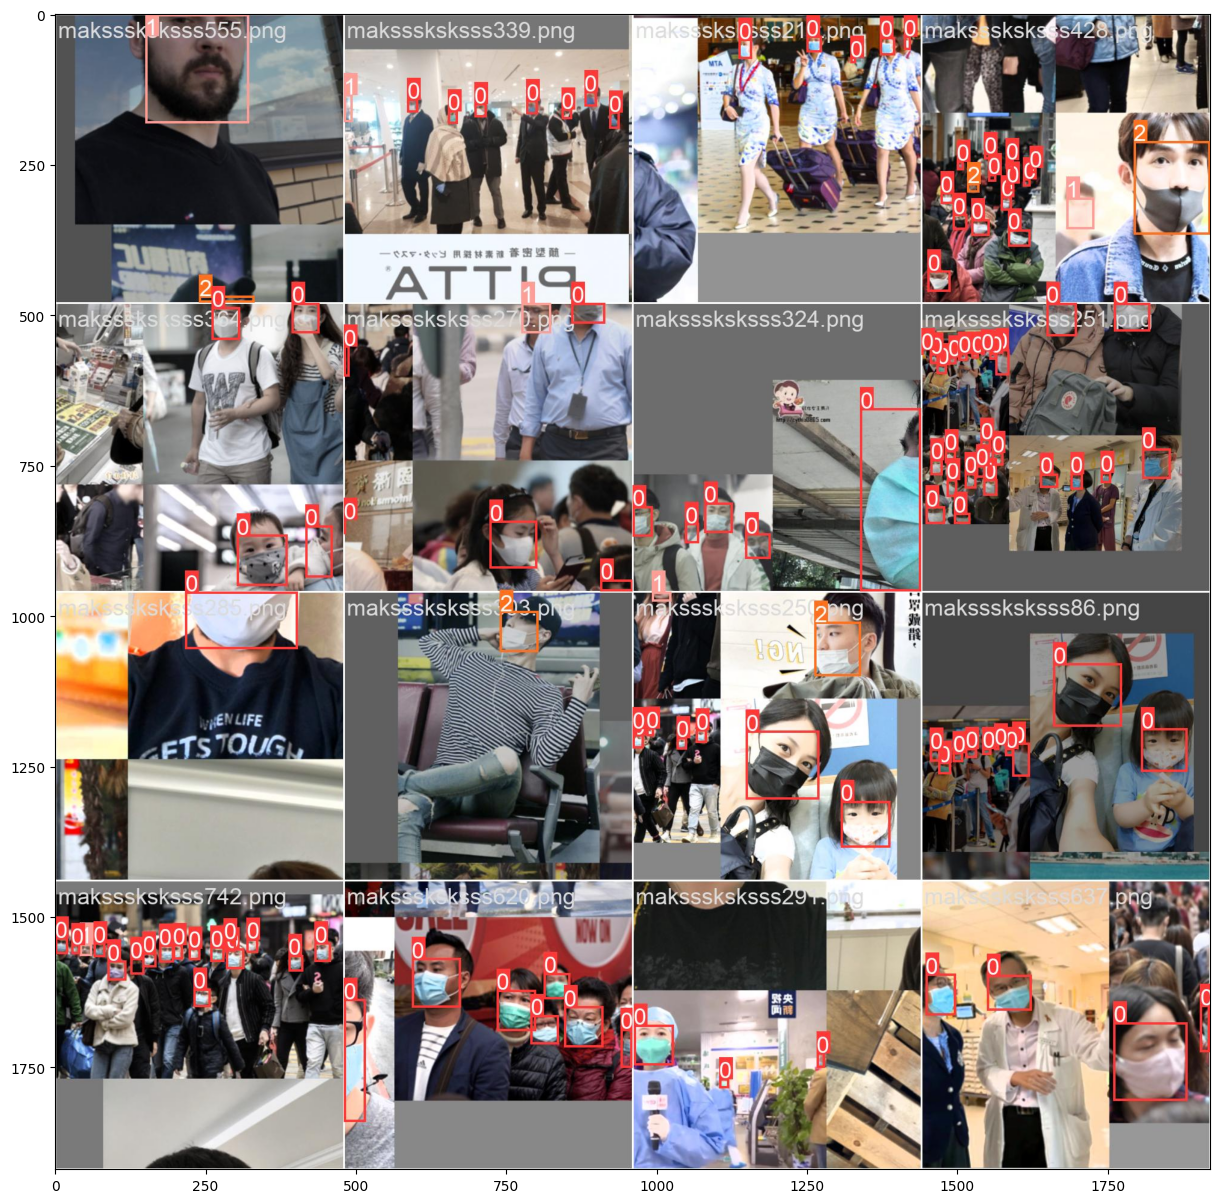

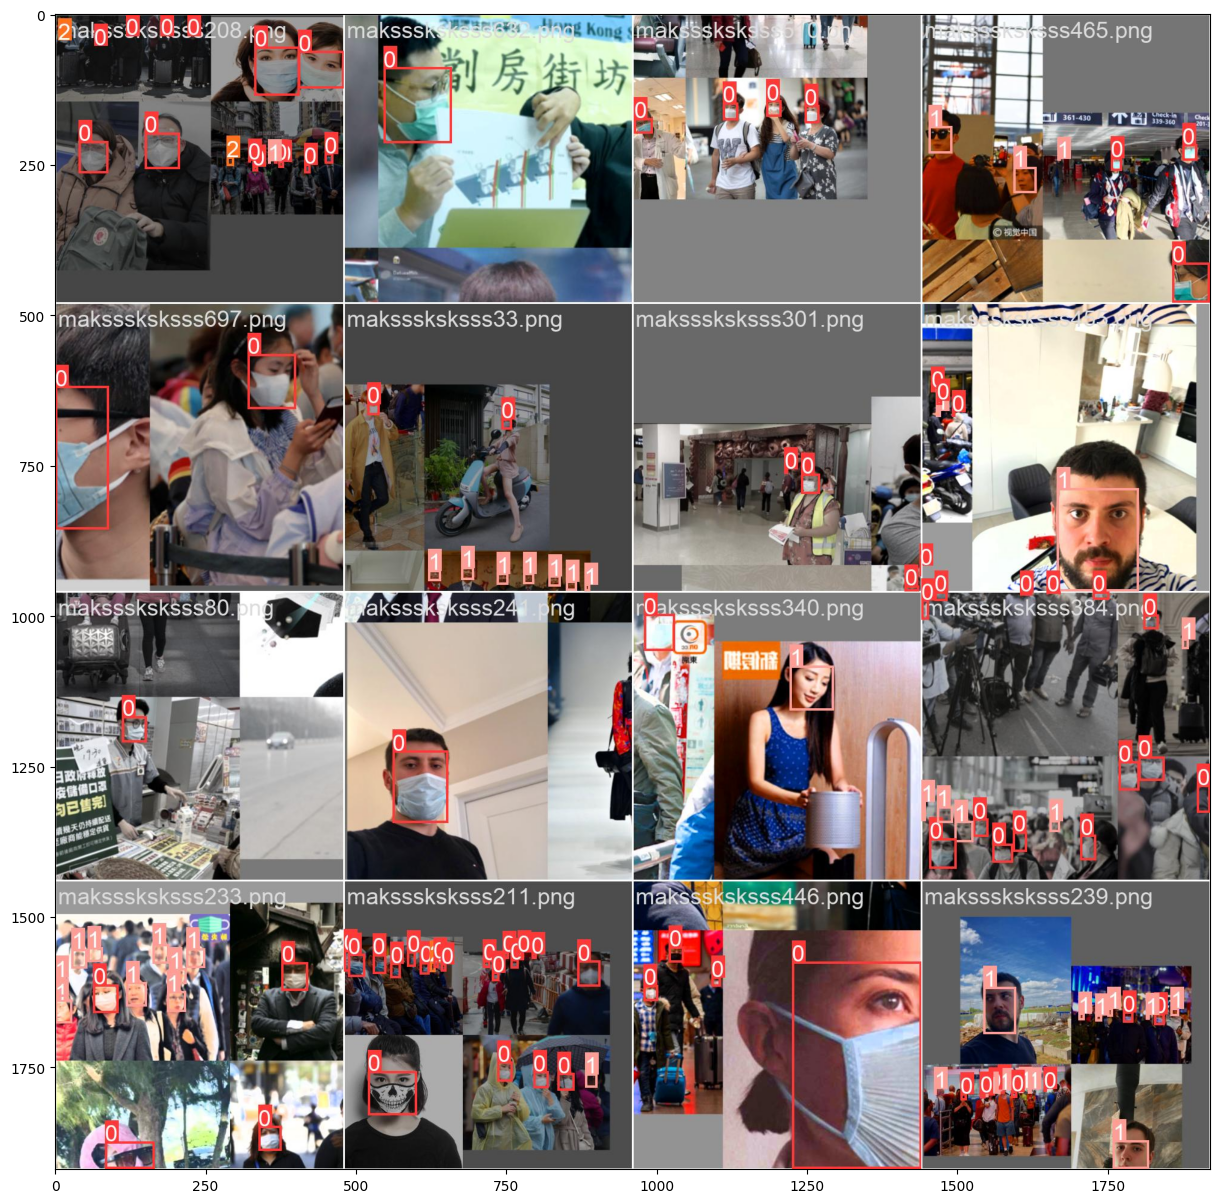

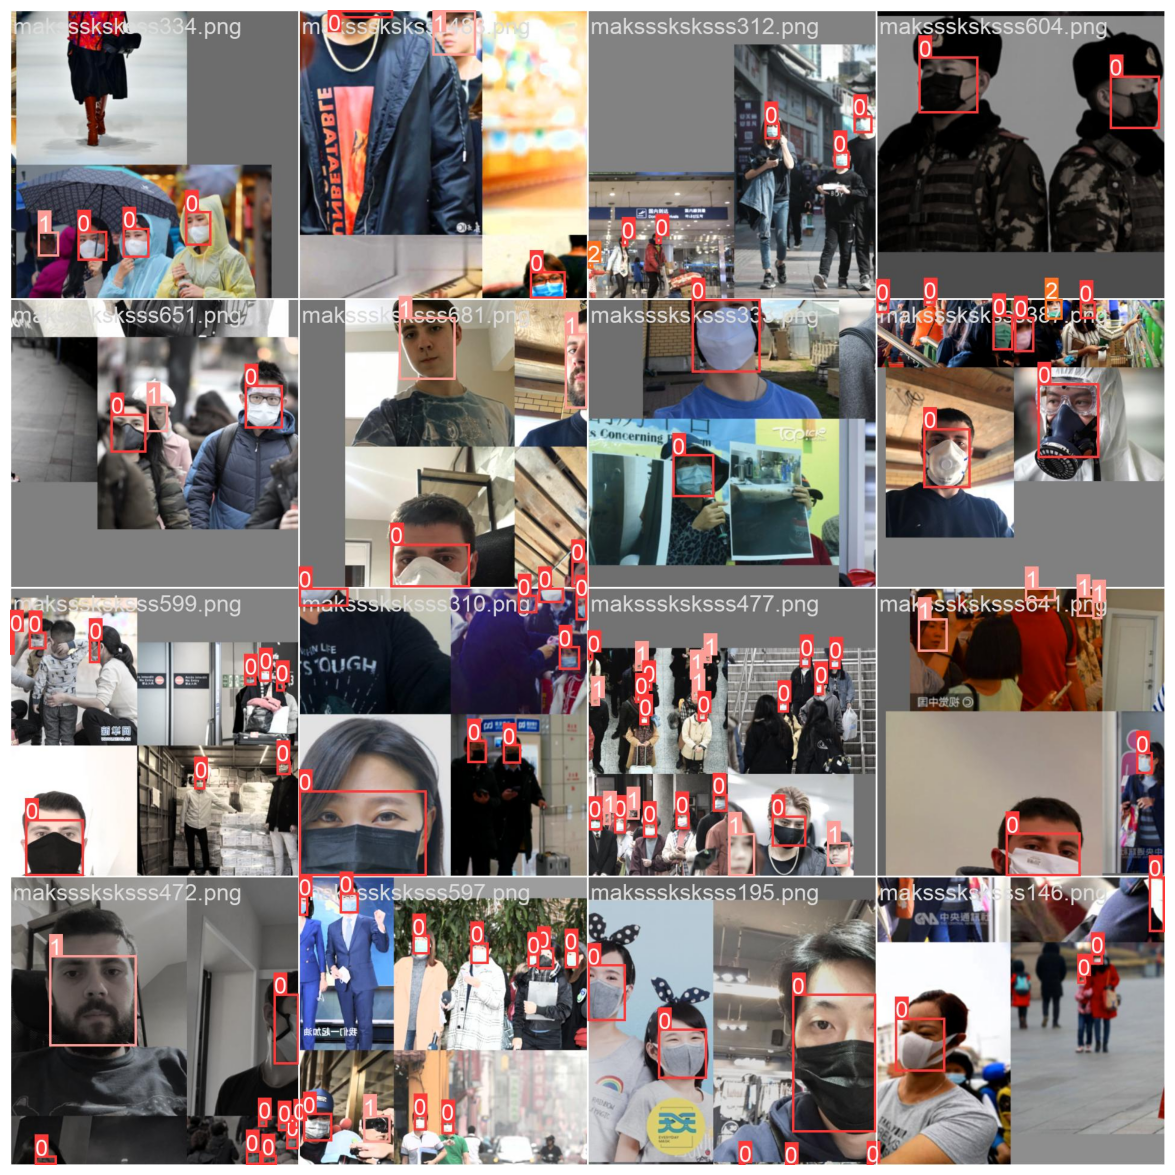

In [7]:
# 바운딩 박스 포함 이미지 경로 설정
tb_1 = plt.imread('runs/train/exp/train_batch0.jpg')
tb_2 = plt.imread('runs/train/exp/train_batch1.jpg')
tb_3 = plt.imread('runs/train/exp/train_batch2.jpg')
# 이미지 출력
plt.figure(figsize=(20,15))
plt.imshow(tb_1)
plt.show()
plt.figure(figsize=(20,15))
plt.imshow(tb_2)
plt.show()
plt.figure(figsize=(20,15))
plt.imshow(tb_3)
plt.axis('off')
plt.show()


### 정확도-신뢰도 곡선, 정밀도-리콜 곡선, 리콜-신뢰도 곡선

##### Presision-Confidence Curve : 모델의 예측 확률과 실제 결과 간의 관계를 평가하는 곡선(모델의 출력하는 확률값이 신뢰할 수 있는지 평가)
##### Precision-Recall Curve : 모델의 정밀도와 재현율 관계를 보여주는 곡선(불균형 데이터셋에서 모델의 성능을 평가하기 위해 사용)
##### Recall-Confidence Curve : 모델 재현율과 신뢰도 간의 관계를 평가하는 곡선(모델이 높은 확률로 예측한 경우 실제로 얼마나 재현율이 높은지 평가)

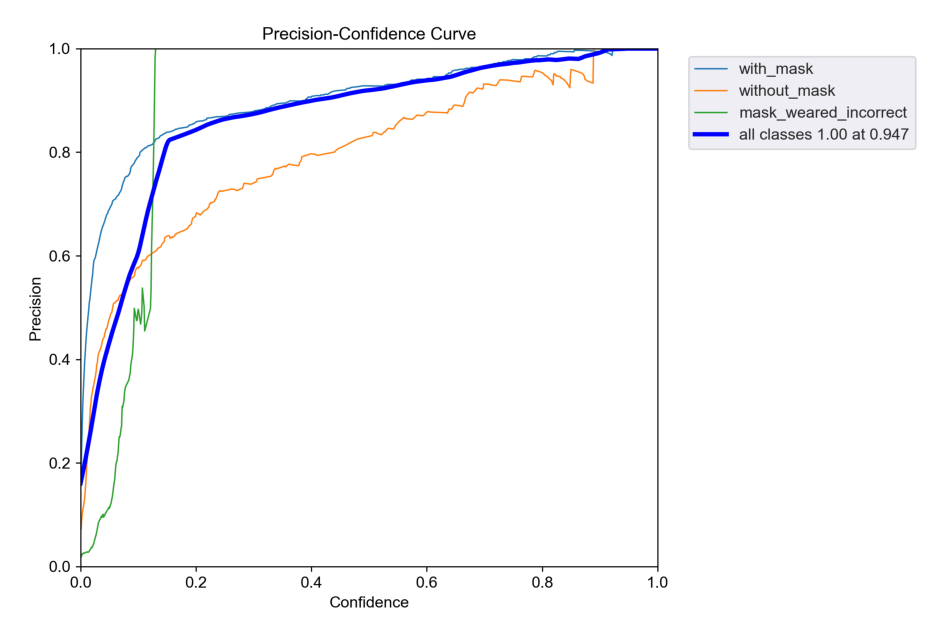

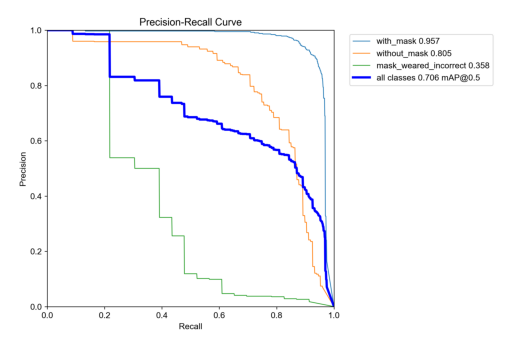

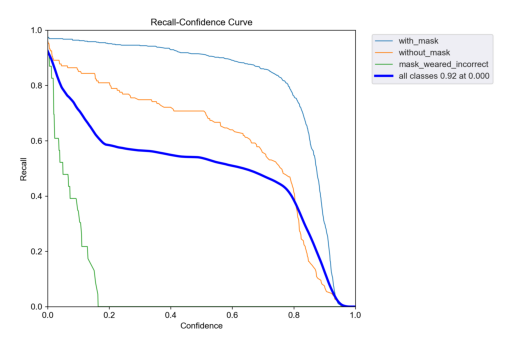

In [14]:
# 곡선 파일 이미지 경로 설정
Pcc = plt.imread('runs/train/exp/P_curve.png')
PRc = plt.imread('runs/train/exp/PR_curve.png')
Rcc = plt.imread('runs/train/exp/R_curve.png')
# 이미지 출력
plt.figure(figsize=(12,9))
plt.imshow(Pcc)
plt.axis('off')
plt.show()
plt.figure(figsize=(12,9))
plt.imshow(PRc)
plt.axis('off')
plt.show()
plt.figure(figsize=(12,9))
plt.imshow(Rcc)
plt.axis('off')
plt.show()

